## 1. Word Cloud

1. Generate a word cloud based on the raw corpus -- I recommend you to use the Python word_cloud library. With the help of nltk (already available in your Anaconda environment), implement a standard text pre-processing pipeline (e.g., tokenization, stopword removal, stemming, etc.) and generate a new word cloud. Discuss briefly the pros and cons (if any) of the two word clouds you generated.

In [1]:
import pandas as pd
import nltk
from nltk.book import FreqDist
import os
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from helpers import preprocess_pipeline
%matplotlib inline

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## Creating the Text File

Taking only Hillary's email body text

In [2]:
emails = pd.read_csv('hillary-clinton-emails/Emails.csv')
emails = emails.ExtractedBodyText.dropna()
emails.to_csv('emails.txt')

## Loading the Text File

In [3]:
d = os.getcwd()
emails = open(path.join(d, 'emails.txt')).read()

## Word Clouds

There are four Word Clouds, raw, stopwords removed, stemming, and specific email words removed

### Tokenizing and Getting Word-Freq Pair

In [21]:
emails_tokenized = nltk.tokenize.word_tokenize(emails) # tokenizing
fdist = FreqDist(emails_tokenized) # word-freq tuples

### Word Cloud 1: Raw

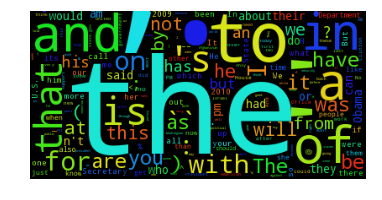

In [22]:
# Read the whole text.
wordcloud = WordCloud(max_words=200,stopwords=None).fit_words(fdist.items())
# Open a plot of the generated image.

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Word Cloud 2
- stopwords removed

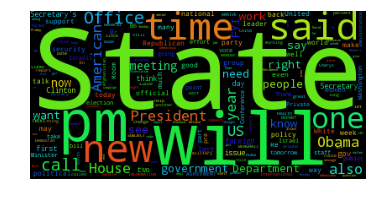

In [23]:
wordcloud = WordCloud(max_words=200).generate(emails)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Word Cloud 3
- Stopwords Removed
- Stemmed

### Stemming

We first process the entire text.

In [11]:
%%bash
split -l 15000 emails.txt # http://ss64.com/bash/split.html

In [15]:
email_text_list = ['xaa','xab','xac','xad']
ppd_list = []
for email_text in email_text_list:
    email_text_open = open(path.join(d, email_text)).read()
    ppd_list.append(preprocess_pipeline(email_text_open, "english", "PorterStemmer", True, True, False))

In [19]:
email_stemmed = ''.join(ppd_list)
email_stemmed_tokenized = nltk.tokenize.word_tokenize(email_stemmed)
fdist1 = FreqDist(email_stemmed_tokenized)

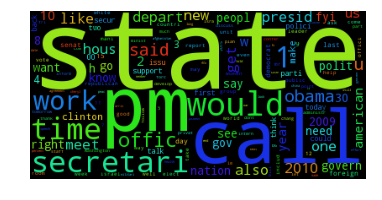

In [20]:
wordcloud = WordCloud(max_words=200).fit_words(fdist1.most_common(200)) # this part gets the stuff
# Open a plot of the generated image.

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Customized Stop-words
Specific to Hillary Clinton's emails, removing words that are common in everyday speech

In [24]:
fdist1.most_common(200)

[('state', 3254),
 ('pm', 2137),
 ('call', 1608),
 ('would', 1537),
 ('secretari', 1409),
 ('time', 1378),
 ('1', 1341),
 ('work', 1294),
 ('offic', 1269),
 ('obama', 1262),
 ('u', 1259),
 ('said', 1241),
 ('presid', 1233),
 ('one', 1232),
 ('depart', 1225),
 ('new', 1106),
 ('meet', 1074),
 ('also', 1010),
 ('hous', 1009),
 ('like', 999),
 ('w', 967),
 ('get', 964),
 ('2010', 957),
 ('american', 954),
 ('us', 945),
 ('year', 943),
 ('10', 933),
 ('2', 930),
 ('govern', 915),
 ('2009', 908),
 ('30', 908),
 ('say', 896),
 ('want', 887),
 ('h', 869),
 ('see', 851),
 ('peopl', 831),
 ('fyi', 830),
 ('need', 820),
 ('nation', 817),
 ('go', 814),
 ('4', 812),
 ('gov', 793),
 ('know', 789),
 ('right', 774),
 ('8', 762),
 ('polit', 753),
 ('clinton', 751),
 ('make', 743),
 ('3', 731),
 ('support', 730),
 ('think', 722),
 ('talk', 721),
 ('secur', 718),
 ('parti', 717),
 ('00', 677),
 ('first', 669),
 ('could', 667),
 ('issu', 660),
 ('today', 657),
 ('polici', 655),
 ('back', 637),
 ('two', 6

### Removing words that are common in everyday speech

In [29]:
hillary_stopwords = ['would','PM', 'pm', 'said','also','like','say', 'want', 'see', 'need', 'go']

filtered = email_stemmed_tokenized[:] #make a copy of the word_list
for word in email_stemmed_tokenized: # iterate over word_list
    if word in hillary_stopwords: 
        filtered.remove(word) # remove word from filtered_word_list if it is a stopword

In [30]:
fdist2 = FreqDist(filtered) # After removing common speech words

### Word Cloud 4
- Stopwords Removed
- Stemmed
- Common Email Words Removed

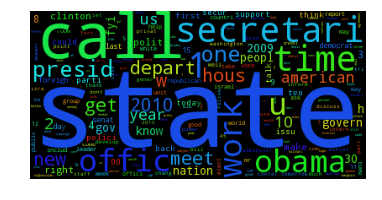

In [31]:
wordcloud = WordCloud(max_words=200).fit_words(fdist2.most_common(200))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [32]:
fdist2.most_common(200)

[('state', 3254),
 ('call', 1608),
 ('secretari', 1409),
 ('time', 1378),
 ('1', 1341),
 ('work', 1294),
 ('offic', 1269),
 ('obama', 1262),
 ('u', 1259),
 ('presid', 1233),
 ('one', 1232),
 ('depart', 1225),
 ('new', 1106),
 ('meet', 1074),
 ('hous', 1009),
 ('w', 967),
 ('get', 964),
 ('2010', 957),
 ('american', 954),
 ('us', 945),
 ('year', 943),
 ('10', 933),
 ('2', 930),
 ('govern', 915),
 ('2009', 908),
 ('30', 908),
 ('h', 869),
 ('peopl', 831),
 ('fyi', 830),
 ('nation', 817),
 ('4', 812),
 ('gov', 793),
 ('know', 789),
 ('right', 774),
 ('8', 762),
 ('polit', 753),
 ('clinton', 751),
 ('make', 743),
 ('3', 731),
 ('support', 730),
 ('think', 722),
 ('talk', 721),
 ('secur', 718),
 ('parti', 717),
 ('00', 677),
 ('first', 669),
 ('could', 667),
 ('issu', 660),
 ('today', 657),
 ('polici', 655),
 ('back', 637),
 ('two', 633),
 ('foreign', 632),
 ('15', 630),
 ('last', 625),
 ('senat', 623),
 ('day', 623),
 ('democrat', 621),
 ('9', 619),
 ('republican', 616),
 ('countri', 614),

### Removing Email Action Words and Numbers

In [35]:
email_stopwords = ['call','time','1','u','meet','w','h','fyi','know', 'right', 'make','support','think','talk','could','well']
filtered2 = filtered[:] #make a copy of the word_list
for word in filtered: # iterate over word_list
    if word in email_stopwords: 
        filtered2.remove(word) # remove word from filtered_word_list if it is a stopword

In [36]:
fdist3 = FreqDist(filtered) # After removing common speech words

### Word Cloud 5
- Stopwords Removed
- Stemmed
- Common Words Removed
- Action Words Removed

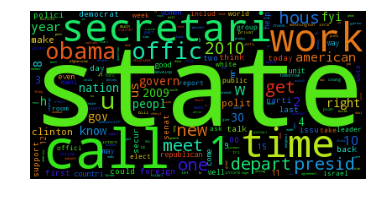

In [37]:
wordcloud = WordCloud(max_words=200).fit_words(fdist3.most_common(200))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

As we can see, the final result is much better than the first.